In [37]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
from matplotlib import pyplot as plt

from numpy.polynomial.polynomial import polyfit
from pprint import pprint
import pandas as pd
import argparse
import csv
import os
import sys
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.patheffects as pe
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import warnings
import sys
import scipy.stats
import textwrap

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Arial') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update()
warnings.filterwarnings('ignore')

In [38]:
parameters = {'y_offset' : 0.4,
              'x_offset' : 0.4,
              'canvas_dimension' : {'figsize':(3.5,3.5)},
              'x_title_dimension': {'size':12},
              'y_title_dimension': {'size':12},
              'z_title_dimension': {'size':12}}


scatter = {'datapoint_0'  : {'color' : '#FF2929', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_1'  : {'color' : '#FB3C35', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_2'  : {'color' : '#F74F41', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_3'  : {'color' : '#F2624D', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_4'  : {'color' : '#EE7559', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_5'  : {'color' : '#EA8865', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_6'  : {'color' : '#E69B71', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_7'  : {'color' : '#E1AE7D', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_8'  : {'color' : '#DDC189', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_9'  : {'color' : '#D9D495', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_10' : {'color' : '#C4C79E', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_11' : {'color' : '#B0B9A8', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_12' : {'color' : '#9BACB1', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_13' : {'color' : '#869FBA', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_14' : {'color' : '#7292C4', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_15' : {'color' : '#5D84CD', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_16' : {'color' : '#4877D6', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_17' : {'color' : '#336ADF', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_18' : {'color' : '#1F5CE9', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1},
           'datapoint_19' : {'color' : '#0A4FF2', 'edgecolors' : '#000000', 'lw' : 0.6, 'marker' : 'o', 's' : 50, 'zorder' : 1}}

labels = {'fontproperties' : fm.FontProperties(size=8),
          'rotation'       : 'horizontal'}

ticks_params =          {
                        'direction'      : 'in',
                        'width'          : 1,
                        'color'          : '#A9A9A9',
                        'labelsize'      : 10
                        }

minor_ticks_params =    {
                        'which'      : 'minor',
                        'width'      :  1,
                        'color'      : '#A9A9A9',
                        'direction'  : 'in',
                        }

In [39]:
def create_csv_dict(csv_table):

    with open(csv_table, 'r') as ct:
        dataframe = pd.read_csv(ct, header=0)

    return dataframe

In [40]:
def read_single_arguments(command_line=None):
    '''
    This function reads the command line arguments
    '''

    parser = argparse.ArgumentParser()

    parser.add_argument(
        '--debug',
        action='store_true',
        help='Print debug info'
    )

    parser.add_argument('-o', '--outfile_name', dest='outfile_name',
                        required=True,
                        type=str,
                        help=('''
                        prefix name for every plot.
                        '''))

    parser.add_argument('-n', '--names_list', dest='names_list',
                        required=True,
                        nargs='+',
                        type=str,
                        help=('''
                        protein names to be shown in the plots.
                        '''))

    parser.add_argument('-p', '--result_path', dest='result_path',
                        required=True,
                        type=str,
                        help=('''
                        path where the plots are stored.
                        '''))

    parser.add_argument('-x', '--xlim', dest='xlim',
                        required=False,
                        nargs='+',
                        type=int
                        )

    parser.add_argument('-y', '--ylim', dest='ylim',
                        required=False,
                        nargs='+',
                        type=int
                        )

    parser.add_argument('-e', '--err_bars', dest='err_bars',
                        required=False,
                        type=bool
                        )

    parser.add_argument('-f', '--fit_line', dest='fit_line',
                        required=False,
                        type=bool
                        )
    subprasers = parser.add_subparsers(dest='command')

    args = parser.parse_args(command_line)
    if args.debug:
        print("debug: " + str(args))

        args = parser.parse_args()

    #----------------------------------------------------------------------------------#
    # Retrieve the arguments
    #----------------------------------------------------------------------------------#
    path = args.path
    name = args.name
    csv_file = args.csv_file
    xlim = args.xlim
    ylim = args.ylim
    err_bars = args.err_bars
    fit_line = args.fit_line

    return (csv_file, path, name, xlim, ylim, err_bars, fit_line)

In [41]:
def plot_out(csv_file, result_path, project, xlim, ylim, err_bars, fit_line):

    csv_dict = create_csv_dict(csv_file)
    csv_dict = csv_dict.sort_values('exp')
    
    if result_path != '.':
        result_path = result_path+'/'+'png/'

        if not os.path.exists(result_path):
            os.makedirs(result_path)
        else:
            asf.print_normal_output("The {} already exists, I am not allowed to overwrite it. Bye bye!".format(result_path))
            sys.exit()

        #return csv_dict
        plot_correlation(csv_dict, result_path, project, xlim, ylim, err_bars, fit_line)

    else:
        #return csv_dict
        plot_correlation(csv_dict, result_path, project, xlim, ylim, err_bars, fit_line)

    return csv_dict

def main():
    csv_file, path, project, xlim, ylim, err_bars, fit_line= read_single_arguments()
    plot_out(csv_file, path, project, xlim, ylim, err_bars, fit_line)

In [42]:
def plot_correlation(csv_dict, project, path, xlim=None,
                                              ylim=None,
                                              err_bars=None,
                                              fit_line=None):


    fig, ax = plt.subplots(**parameters['canvas_dimension'])
    
    if ylim != None:
        ax.set_yticks(np.arange(ylim[0], ylim[1]+parameters['y_offset'], ylim[2]))
        ax.set_ylim(ylim[0]-parameters['y_offset'], ylim[1]+parameters['y_offset'])

    if xlim != None:
        ax.set_xticks(np.arange(xlim[0], xlim[1]+parameters['x_offset'], xlim[2]))
        ax.set_xlim(xlim[0]-parameters['x_offset'], xlim[1]+parameters['x_offset'])

    df_col_length = len(csv_dict.iloc[:,0])

    #for i in range(df_col_length):
    #    ax.scatter(csv_dict.iloc[i:,0], csv_dict.iloc[i:,1], c=csv_dict.iloc[:,1])#**scatter['datapoint_{}'.format(i)])
        
    ax.scatter(csv_dict.iloc[:,0], csv_dict.iloc[:,1], c=csv_dict.iloc[:,1], cmap='RdBu', vmin=53, vmax=59, edgecolors='#000000', lw=0.6, marker='o', s=30, zorder=1)
    #**scatter['datapoint_{}'.format(i)])
    
    cbar = ax.figure.colorbar(ax.collections[0])
    cbar.ax.tick_params(axis='y', direction='in', width=1, color='#A9A9A9')

    # Fancy stuff starting here
    if err_bars == True:
        ax.errorbar(csv_dict.iloc[:,0], csv_dict.iloc[:,1], csv_dict.iloc[:,3], capsize=1.4, capthick=0.9, ls='none', ecolor='#000000', alpha=0.7, lw=0.9, zorder=0)
    
    exp = list(csv_dict.iloc[:,0])
    com = list(csv_dict.iloc[:,1])
    exp_f = []
    com_f = []
    
    if fit_line == True:

        # intercept (b), angular coefficient (m)
        m, b, r, _, _ = scipy.stats.linregress(exp, com)
        print(f'r squared is: {r}')
        # >>>> Trend Line Emission
        exp_f = [ax.get_xlim()[0]] + exp
        exp_f.append(ax.get_xlim()[1])
        com_f = [ax.get_ylim()[0]] + com
        com_f.append(ax.get_ylim()[1])
        
        ax.plot(exp_f, b + m * np.asarray(exp_f), lw=1, color='#FF8000', label='${\mathrm{Computational\hspace{0.05in}fitting}}$', zorder=0)
        
    #ax.tick_params(**minor_ticks_params)
    ax.tick_params(axis='x', **ticks_params)
    ax.tick_params(axis='y', **ticks_params)
    # >>>> Labels and relative font-formatting.
    print(ax.get_yticks())
    print(ax.get_xticks())
    ax.set_yticklabels(ax.get_yticks(),)
    ax.set_xticklabels(ax.get_xticks(),)
    ax.yaxis.set_major_formatter(FormatStrFormatter('$%.1f$'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('$%.1f$'))

    plt.savefig('/home/leonardo/scatter_cbar.png', bbox_inches='tight', dpi=600, Transparent=True)
    plt.show()


r squared is: 0.8370008301788693
[52. 53. 54. 55. 56. 57. 58.]
[52. 53. 54. 55. 56. 57. 58.]


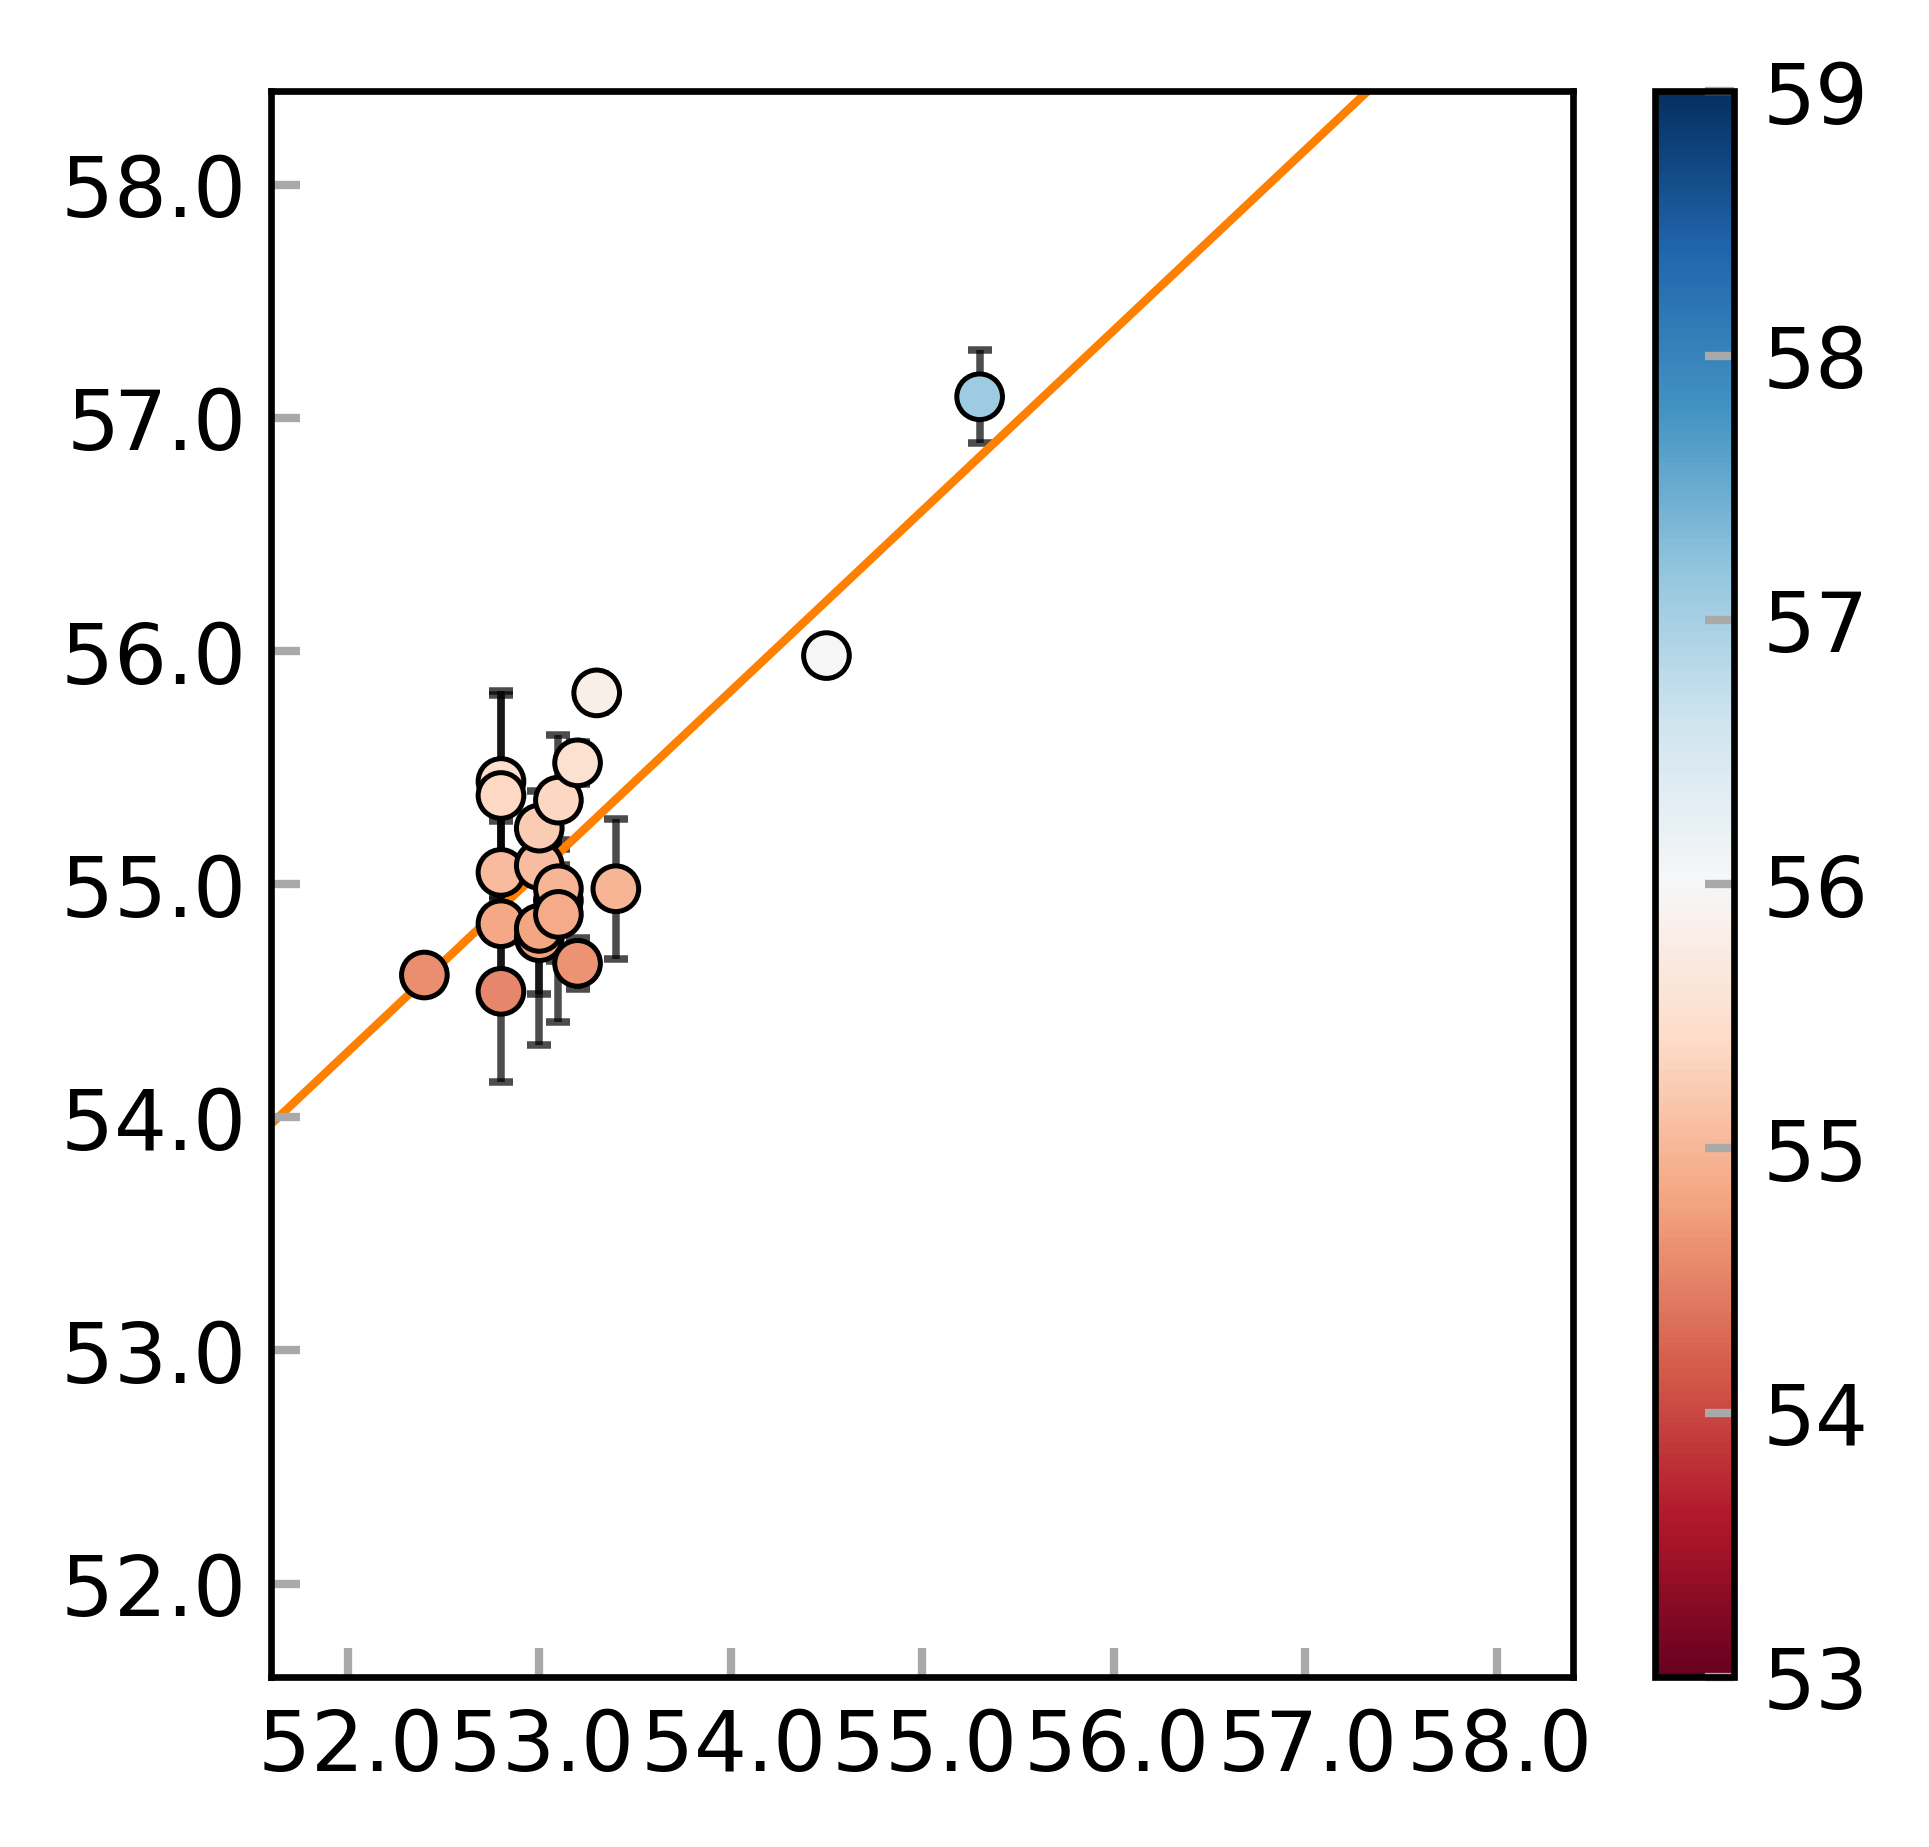

In [43]:
xlim = (52.0, 58.0, 1.0)
ylim = (52.0, 58.0, 1.0)
err_bars = True
fit_line = True
csv_file = '/home/leonardo/Desktop/JupyterLab_Templates/csv/kr2_absorption.csv'
project = 'kr2_absorption_pe'
path = '.'
df = plot_out(csv_file, path, project, xlim, ylim, err_bars, fit_line)

In [44]:
df

,exp,a_arm_10,a_arm_1,stdev
19,52.4,54.61,54.50,0.06
17,52.8,55.44,55.38,0.39
16,52.8,54.54,54.50,0.39
15,52.8,54.83,54.80,0.22
14,52.8,55.05,55.10,0.22
18,52.8,55.38,55.50,0.43
13,53.0,55.08,55.10,0.08
12,53.0,54.77,54.80,0.24
11,53.0,55.24,55.20,0.16
10,53.0,54.81,54.60,0.50
